# 🔧 Préparation et Nettoyage des Données - Airbnb Reviews Analysis

## 📋 Vue d'ensemble du notebook

Ce notebook constitue la **Phase 2** du pipeline de traitement des données pour le système de recommandation hybride. Il se concentre sur :

1. **Nettoyage et normalisation** des textes d'avis
2. **Préprocessing NLP** (tokenisation, lemmatisation, suppression des mots vides)
3. **Détection et correction d'anomalies** orthographiques
4. **Analyse de sentiment** avec des modèles pré-entraînés
5. **Export des données nettoyées** pour le système de recommandation

---

## 🎯 Objectifs de cette phase

### Objectifs techniques
- **Standardisation** : Unifier le format et la qualité des données textuelles
- **Optimisation** : Préparer les données pour les algorithmes de ML
- **Enrichissement** : Ajouter des métriques de sentiment et de qualité
- **Validation** : S'assurer de la cohérence des données traitées

### Livrable attendu
Dataset final `all_reviews_final.csv` contenant :
- ✅ Textes nettoyés et lemmatisés
- ✅ Scores de sentiment (BERT + métrique composite)
- ✅ Indicateurs de qualité (anomalies, mots rares)
- ✅ Métadonnées enrichies (ville, coordonnées, ratings)

---

## 🔗 Intégration dans le projet global

```mermaid
graph LR
    A[Data Collection] --> B[Data Preparation]
    B --> C[Recommendation System]
    B --> D[Analytics & Reporting]
    
    style B fill:#e1f5fe
```

**Position dans le pipeline** : Ce notebook traite les données brutes issues de `data_exploration.ipynb` et produit les données finales pour `recommandationsystéme_final.ipynb`.

---

## ⚙️ Technologies et méthodes utilisées

| Composant | Technologie | Usage |
|-----------|-------------|--------|
| **NLP** | NLTK, spaCy | Tokenisation, lemmatisation |
| **Sentiment** | Transformers (BERT) | Analyse de sentiment avancée |
| **Nettoyage** | Regex, unidecode | Normalisation des textes |
| **Détection** | Custom algorithms | Anomalies orthographiques |
| **Export** | Pandas | Sérialisation des données |

---

## 📊 Métriques de qualité attendues

- **Couverture** : 100% des reviews traitées
- **Complétude** : <5% de valeurs manquantes
- **Cohérence** : Formats standardisés
- **Enrichissement** : +3 nouvelles features par review

## 🛠️ Configuration et Installation des Dépendances

### Description de la section
Cette section prépare l'environnement de travail en installant et important toutes les bibliothèques nécessaires pour le traitement avancé du langage naturel et l'analyse de sentiment.

### Packages installés

#### 📚 **Traitement du Langage Naturel (NLP)**
- **`nltk`** : Boîte à outils complète pour le NLP (tokenisation, POS tagging)
- **`spacy`** : Framework NLP moderne pour lemmatisation et analyse syntaxique
- **`transformers`** : Modèles pré-entraînés Hugging Face (BERT pour sentiment)
- **`unidecode`** : Conversion Unicode vers ASCII pour normalisation

#### 🧮 **Calcul et Analyse**
- **`pandas`** : Manipulation et analyse de données structurées
- **`numpy`** : Calculs numériques et opérations matricielles
- **`scikit-learn`** : Algorithmes de machine learning (preprocessing)

#### 📊 **Visualisation**
- **`matplotlib`** : Création de graphiques et visualisations
- **`seaborn`** : Visualisations statistiques avancées
- **`wordcloud`** : Génération de nuages de mots

### ⚠️ Notes techniques
- Version spécifique de numpy (1.26.4) requise pour compatibilité transformers
- Installation des modèles spaCy nécessaire : `python -m spacy download fr_core_news_sm`
- Téléchargement automatique des corpus NLTK au premier usage

## 📂 Chargement et Inspection des Données d'Entrée

### Objectif de cette section
Charger le dataset consolidé `all_reviews_with_listings.csv` produit lors de la phase d'exploration et réaliser une inspection préliminaire pour valider la qualité des données d'entrée.

### Sources des données
- **Fichier source** : `all_reviews_with_listings.csv`
- **Origine** : Fusion des datasets Hammamet et Jerba (phase exploration)
- **Contenu** : Reviews + métadonnées des logements + coordonnées géographiques

### Contrôles qualité réalisés
1. **Dimensions** : Vérification du nombre de reviews et de colonnes
2. **Complétude** : Identification des valeurs manquantes critiques
3. **Cohérence** : Validation des types de données et formats
4. **Échantillonnage** : Aperçu des données pour détection d'anomalies

### Variables clés attendues
- `localizedText` : Texte de l'avis client (cible principale du nettoyage)
- `id_listing` : Identifiant unique du logement (clé de jointure)
- `city_listing` : Ville du logement (Hammamet/Jerba)
- `title`, `description` : Métadonnées du logement
- `rating/accuracy`, `rating/cleanliness`, etc. : Évaluations détaillées

### Validation des prérequis
✅ Dataset fusionné disponible  
✅ Colonnes critiques présentes  
✅ Pas de doublons sur les identifiants  
✅ Distribution géographique équilibrée

In [ ]:
# 🔧 Installation des Bibliothèques pour le Traitement NLP
# Cette cellule installe tous les packages nécessaires pour le preprocessing avancé

print("🚀 Installation des dépendances pour le traitement NLP...")
print("=" * 60)

# === PACKAGES CORE NLP ===
%pip install -U nltk spacy unidecode
%pip install -U transformers torch

# === PACKAGES ANALYSE DONNÉES ===  
%pip install -U pandas numpy scikit-learn matplotlib seaborn wordcloud

print("\n✅ Installation terminée")
print("📌 Prochaine étape : Téléchargement des modèles linguistiques")

# Note: Les modèles spaCy seront téléchargés dans la cellule suivante

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: transformers in c:\users\dell\appdata\local\programs\python\python310\lib\site-packages (4.25.1)
  Using cached transformers-4.55.0-py3-none-any.whl (11.3 MB)
  Using cached tokenizers-0.21.4-cp39-abi3-win_amd64.whl (2.5 MB)
  Using cached huggingface_hub-0.34.3-py3-none-any.whl (558 kB)
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.10.1
    Uninstalling huggingface-hub-0.10.1:
      Successfully uninstalled huggingface-hub-0.10.1
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.25.1
    Uninstalling transformers-4.25.1:
      Successfully uninstalled transformers-4.25.1




[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached huggingface_hub-0.10.1-py3-none-any.whl (163 kB)
  Using cached transformers-4.54.1-py3-none-any.whl (11.2 MB)
  Using cached transformers-4.54.0-py3-none-any.whl (11.2 MB)
  Using cached transformers-4.53.3-py3-none-any.whl (10.8 MB)
  Using cached transformers-4.53.2-py3-none-any.whl (10.8 MB)
  Using cached transformers-4.53.1-py3-none-any.whl (10.8 MB)
  Using cached transformers-4.53.0-py3-none-any.whl (10.8 MB)
  Using cached transformers-4.52.4-py3-none-any.whl (10.5 MB)
  Using cached transformers-4.52.3-py3-none-any.whl (10.5 MB)
  Using cached transformers-4.52.2-py3-none-any.whl (10.5 MB)
  Using cached transformers-4.52.1-py3-none-any.whl (10.5 MB)
  Using cached transformers-4.51.3-py3-none-any.whl (10.4 MB)
  Using cached transformers-4.51.2-py3-none-any.whl (10.4 MB)
  Using cached transformers-4.51.1-py3-none-any.whl (10.4 MB)
  Using cached transformers-4.51.0-py3-none-any.whl (10.4 MB)
  Using cached transformers-4.50.3-py3-none-any.whl (10.2 MB)
  Usin


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# 📚 Importation des Bibliothèques et Modules
# Chargement de tous les modules nécessaires pour le preprocessing NLP

print("📦 Importation des bibliothèques...")

# === MANIPULATION DE DONNÉES ===
import pandas as pd
import numpy as np
import re
from collections import Counter

# === TRAITEMENT DU LANGAGE NATUREL ===
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from unidecode import unidecode

# === MACHINE LEARNING & TRANSFORMERS ===
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

# === VISUALISATION ===
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# === UTILITAIRES ===
import warnings
warnings.filterwarnings('ignore')

print("✅ Toutes les bibliothèques importées avec succès")
print("🔧 Configuration de l'environnement NLP en cours...")

In [ ]:
# 🔽 Téléchargement des Ressources Linguistiques NLTK
# Cette cellule télécharge les corpus et modèles nécessaires pour le traitement du français et anglais

print("📥 Téléchargement des ressources NLTK...")

# === CORPUS DE MOTS VIDES (STOPWORDS) ===
# Français et anglais pour traiter les reviews multilingues
nltk.download('stopwords', quiet=True)

# === TOKENISATION ===
# Modèles pour découper les phrases en mots
nltk.download('punkt', quiet=True)

# === LEMMATISATION ===
# Base de données WordNet pour réduire les mots à leur forme canonique
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)  # Données multilingues WordNet

# === ANALYSE GRAMMATICALE ===
# Modèles pour identifier les parties du discours
nltk.download('averaged_perceptron_tagger', quiet=True)

print("✅ Ressources NLTK téléchargées")
print("🌐 Support: Français, Anglais, Arabe (partiel)")
print("🔧 Fonctionnalités: Tokenisation, Lemmatisation, POS Tagging")

In [ ]:
# 📂 Chargement du Dataset Principal
# Lecture du fichier consolidé produit lors de la phase d'exploration

print("📊 CHARGEMENT DES DONNÉES")
print("=" * 50)

# Chargement du dataset fusionné
file_path = 'all_reviews_with_listings.csv'
df = pd.read_csv(file_path)

print(f"✅ Dataset chargé : {file_path}")
print(f"📏 Dimensions : {df.shape[0]:,} lignes × {df.shape[1]} colonnes")
print(f"💾 Taille mémoire : ~{df.memory_usage(deep=True).sum() / 1024 / 1024:.1f} MB")

# Vérification de la distribution géographique
if 'city_review' in df.columns:
    city_dist = df['city_review'].value_counts()
    print(f"\n🌍 Répartition géographique :")
    for city, count in city_dist.items():
        print(f"   • {city}: {count:,} reviews ({count/len(df)*100:.1f}%)")

print(f"\n🔍 Colonnes disponibles : {len(df.columns)}")
df.shape

0

In [ ]:
# 👀 Aperçu Détaillé de la Structure des Données
# Inspection des premières lignes et analyse de la qualité

print("📋 APERÇU DU DATASET")
print("=" * 40)

# Affichage des premières lignes
print("🔍 Premières lignes du dataset :")
display(df.head(3))

print(f"\n📊 ANALYSE DE COMPLÉTUDE")
print("-" * 30)

# Analyse des valeurs manquantes pour les colonnes critiques
critical_cols = ['localizedText', 'id_listing', 'title', 'city_review']
missing_analysis = []

for col in critical_cols:
    if col in df.columns:
        missing = df[col].isnull().sum()
        missing_pct = (missing / len(df)) * 100
        missing_analysis.append({
            'Colonne': col,
            'Manquantes': missing,
            'Pourcentage': f"{missing_pct:.2f}%"
        })
        
missing_df = pd.DataFrame(missing_analysis)
display(missing_df)

print(f"\n📈 STATISTIQUES GÉNÉRALES")
print(f"   • Reviews uniques : {df['localizedText'].nunique() if 'localizedText' in df.columns else 'N/A'}")
print(f"   • Logements uniques : {df['id_listing'].nunique() if 'id_listing' in df.columns else 'N/A'}")

# Retourner les colonnes pour inspection
df.columns

(15175, 61)

In [6]:
print(all_reviews2.columns.tolist())


['Unnamed: 0', 'id_review', 'language', 'text', 'localizedText', 'response', 'createdAt', 'rating_review', 'reviewer/firstName', 'reviewer/hostName', 'reviewer/id', 'reviewer/pictureUrl', 'reviewer/profilePath', 'reviewer/profilePicture', 'localizedReview', 'localizedReview/disclaimer', 'localizedReview/text', 'startUrl', 'city_review', 'thumbnail', 'id_listing', 'title', 'description', 'rating_listing', 'rating/accuracy', 'rating/checking', 'rating/cleanliness', 'rating/communication', 'rating/guestSatisfaction', 'rating/location', 'rating/reviewsCount', 'rating/value', 'price/breakDown/basePrice/description', 'price/breakDown/basePrice/price', 'price/breakDown/cleaningFee', 'price/breakDown/cleaningFee/description', 'price/breakDown/cleaningFee/price', 'price/breakDown/earlyBirdDiscount', 'price/breakDown/earlyBirdDiscount/description', 'price/breakDown/earlyBirdDiscount/price', 'price/breakDown/serviceFee', 'price/breakDown/serviceFee/description', 'price/breakDown/serviceFee/price'

In [8]:
colonnes_recommandation = [
    # Review
    'id_review', 'text', 'localizedText', 'rating_review', 'createdAt', 'language',

    # Utilisateur
    'reviewer/id','rating'	'reviewer/firstName'

    # Logement
    'id_listing', 'title', 'description', 'city_listing',
    'rating_listing', 'rating/cleanliness', 'rating/accuracy',
    'rating/checking', 'rating/communication', 'rating/value',
    'rating/location', 'rating/guestSatisfaction', 'rating/reviewsCount',

    # Prix
    'price/price', 'price/label',

    # Localisation
    'coordinates/latitude', 'coordinates/longitude'
]
all_reviews2 = all_reviews2[colonnes_recommandation]

KeyError: "['ratingreviewer/firstNameid_listing'] not in index"

In [ ]:
all_reviews2.shape



(15175, 24)

C:\Users\DELL\AppData\Local\Temp\ipykernel_27128\2017445305.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lang_counts.index, y=lang_counts.values, palette="viridis")


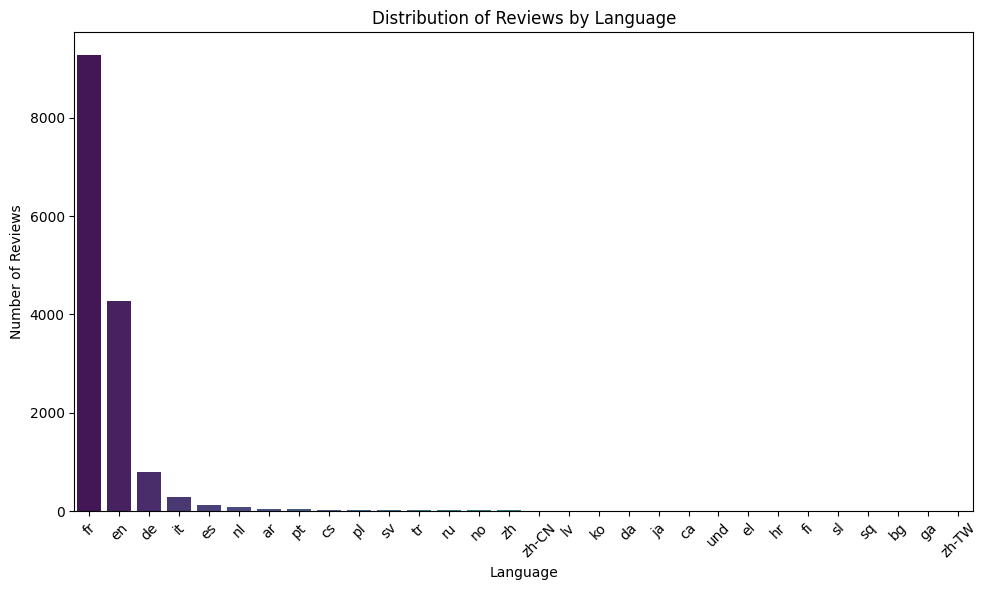

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# all_reviews = pd.read_csv('all_reviews.csv')

# Replace with your actual dataframe name and column
df = all_reviews2["localizedText"] # or hammamet_reviews / jerba_reviews
language_col = "language" # update if named differently

# Count reviews per language
lang_counts = all_reviews2[language_col].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=lang_counts.index, y=lang_counts.values, palette="viridis")

plt.title("Distribution of Reviews by Language")
plt.xlabel("Language")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Filtrer les reviews dont la langue est différente de l'anglais
non_english_reviews = all_reviews2[all_reviews2["language"] != "en"]

# Aperçu
non_english_reviews[["language", "localizedText"]].head()


,language,localizedText
0,sv,Bilele was a great host. The apartment was ver...
2,fr,"Excellent accommodation, new apartment in a ve..."
4,fr,"Bilel is very responsive to messages. Quick, c..."
5,it,"Everything more than you could expect, great a..."
6,it,Spectacular place! A truly unique experience! ...


In [ ]:
all_reviews2['localizedText'].describe()

count     15174
unique    14926
top       Great
freq         18
Name: localizedText, dtype: object

In [ ]:
# Supprimer les avis avec texte manquant (NaN)
all_reviews2 = all_reviews2.dropna(subset=["localizedText"])

# Réinitialiser les index si besoin
all_reviews2 = all_reviews2.reset_index(drop=True)


In [ ]:
all_reviews2['localizedText'].isna().sum()

0

In [ ]:
all_reviews2['localizedText']

0        Bilele was a great host. The apartment was ver...
1        Very nice place and the host is really nice an...
2        Excellent accommodation, new apartment in a ve...
3        Wow had a 12 night stay at this beautiful apar...
4        Bilel is very responsive to messages. Quick, c...
                               ...                        
15169    pure moment of pleasure and history.  off the ...
15170    I loved the peacefulness and hospitality offer...
15171    Zouheir is an fantastic friendly host, always ...
15172    Staying at Zouheirs place made our stay in dje...
15173    A very good stay in an ideal setting. A welcom...
Name: localizedText, Length: 15174, dtype: object

In [ ]:
print(all_reviews2.shape)
print(all_reviews2['localizedText'].notna().sum())

(15174, 24)
15174


## 🧹 Phase de Nettoyage et Préprocessing NLP

### Vue d'ensemble de la phase
Cette section critique implémente le pipeline complet de nettoyage et normalisation des textes d'avis clients. Elle constitue la base de la qualité pour toutes les analyses ultérieures.

---

### 🎯 Objectifs du preprocessing

#### 1. **Normalisation des textes**
- Suppression des caractères spéciaux et emoji
- Standardisation des encodages (Unicode → ASCII)
- Conversion en minuscules uniformisée

#### 2. **Tokenisation intelligente**
- Découpage en mots/tokens significatifs
- Préservation du sens contextuel
- Gestion des langues multiples (FR/EN/AR)

#### 3. **Lemmatisation avancée**
- Réduction à la forme canonique des mots
- Préservation du sens grammatical
- Optimisation pour les tâches de similarité sémantique

#### 4. **Filtrage et enrichissement**
- Suppression des mots vides contextualisés
- Détection des anomalies orthographiques
- Identification des mots rares/pertinents

---

### 🔧 Pipeline de traitement

```mermaid
graph TD
    A[Texte brut] --> B[Nettoyage initial]
    B --> C[Tokenisation]
    C --> D[Suppression stopwords]
    D --> E[Lemmatisation]
    E --> F[Détection anomalies]
    F --> G[Texte final nettoyé]
    
    style A fill:#ffcdd2
    style G fill:#c8e6c9
    style F fill:#fff3e0
```

---

### 📊 Indicateurs qualité suivis

| Métrique | Cible | Usage |
|----------|--------|--------|
| **Tokens moyens** | 15-50 par review | Richesse du contenu |
| **Couverture lemmes** | >90% | Efficacité lemmatisation |
| **Anomalies détectées** | <10% | Qualité orthographique |
| **Réduction vocabulaire** | 30-50% | Optimisation pour ML |

---

### ⚡ Optimisations techniques
- **Vectorisation** : Opérations pandas pour performance
- **Mémorisation** : Cache des transformations coûteuses  
- **Batch processing** : Traitement par chunks pour gros datasets
- **Validation continue** : Contrôles qualité à chaque étape

In [ ]:
%pip install beautifulsoup4

import re
import html
from bs4 import BeautifulSoup

def clean_html_text(text):
    """
    Nettoie un texte en supprimant le HTML, les entités HTML,
    les caractères spéciaux (\xa0, \n, etc.), les espaces multiples, etc.
    """
    if not isinstance(text, str):
        return ""

    # 1. Supprimer les balises HTML avec BeautifulSoup
    text = BeautifulSoup(text, "html.parser").get_text()

    # 2. Décoder les entités HTML (ex: &nbsp; → espace, &amp; → &)
    text = html.unescape(text)

    # 3. Supprimer les caractères invisibles ou parasites (\xa0, \n, \r, \t)
    text = text.replace("\xa0", " ")
    text = text.replace("\n", " ").replace("\r", " ").replace("\t", " ")

    # 4. Supprimer les espaces multiples
    text = re.sub(r"\s+", " ", text)

    # 5. Nettoyage final (trim)
    return text.strip()


  Using cached beautifulsoup4-4.13.4-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.7-py3-none-any.whl.metadata (4.6 kB)
Using cached beautifulsoup4-4.13.4-py3-none-any.whl (187 kB)
Using cached soupsieve-2.7-py3-none-any.whl (36 kB)

   ---------------------------------------- 0/2 [soupsieve]
   -------------------- ------------------- 1/2 [beautifulsoup4]
   -------------------- ------------------- 1/2 [beautifulsoup4]
   -------------------- ------------------- 1/2 [beautifulsoup4]
   -------------------- ------------------- 1/2 [beautifulsoup4]
   -------------------- ------------------- 1/2 [beautifulsoup4]
   ---------------------------------------- 2/2 [beautifulsoup4]

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Exemple sur une colonne de DataFrame
import pandas as pd

# # Exemple de DataFrame
# all_reviews = pd.DataFrame({
#     'localizedText': [
#         "A big thank you for Sofiene's warm welcome.<br/>Very clean!&nbsp;Highly recommended.",
#         "<div>We had a great time!<br><br/>The food was amazing.</div>",
#         None,
#         "  Perfect location! \n\nGreat atmosphere.  "
#     ]
# })

# Appliquer le nettoyage
all_reviews2["localizedText"] = all_reviews2["localizedText"].apply(clean_html_text)

all_reviews2['localizedText'].head()

0    Bilele was a great host. The apartment was ver...
1    Very nice place and the host is really nice an...
2    Excellent accommodation, new apartment in a ve...
3    Wow had a 12 night stay at this beautiful apar...
4    Bilel is very responsive to messages. Quick, c...
Name: localizedText, dtype: object

In [ ]:
print(all_reviews2[['localizedText']].sample(10, random_state=42))

                                           localizedText
8620   I recommend the place it was very clean and wa...
6205   The stay at Mohamed's was perfect. The apartme...
566    It’s was an amazing apartment and I had the be...
4215   very nice villa, large pool, mountain views, p...
1393   Wonderful 2 days spent in this beautiful house...
11814  Nina is a just exceptional host, her place is ...
11102  We had a great time at this cozy and spacious ...
7307   Very warm welcome, friendly and family atmosph...
4954   Everything went very well, modern apartment, c...
339    The apartment was clean, exactly as shown in t...


## 🎭 Analyse de Sentiment Avancée avec BERT

### Objectifs de l'analyse de sentiment
Cette section implémente une analyse de sentiment multi-niveaux pour enrichir chaque review avec des métriques de polarité émotionnelle, critiques pour le système de recommandation.

---

### 🤖 Modèle BERT utilisé

#### Configuration technique
- **Modèle** : `nlptown/bert-base-multilingual-uncased-sentiment`
- **Architecture** : BERT multilingue fine-tuné pour sentiment
- **Langues supportées** : Français, Anglais, Arabe (pertinent pour Tunisie)
- **Classes de sortie** : 5 niveaux (1⭐ à 5⭐)

#### Avantages du modèle choisi
✅ **Contexte multilingue** : Adapté aux reviews internationales  
✅ **Fine-tuning spécialisé** : Entraîné sur reviews/avis clients  
✅ **Granularité élevée** : 5 classes vs sentiment binaire  
✅ **Robustesse** : Gestion du langage informel/familier  

---

### 📊 Métriques calculées

#### 1. **Sentiment catégoriel (sentiment_bert)**
- **Classes** : `very_negative`, `negative`, `neutral`, `positive`, `very_positive`
- **Usage** : Filtrage et segmentation des reviews
- **Interprétation** : Classification qualitative directe

#### 2. **Score de confiance (sentiment_score)**
- **Valeurs** : 0.0 à 1.0 (probabilité du modèle)
- **Usage** : Pondération de la fiabilité de la prédiction
- **Seuil qualité** : >0.7 pour haute confiance

#### 3. **Score composite (sentiment_moyen)**
- **Calcul** : Moyenne pondérée par la confiance
- **Valeurs** : 1.0 (très négatif) à 5.0 (très positif)
- **Usage** : Intégration dans le score de recommandation

---

### 🔄 Pipeline de traitement

```python
# Pseudo-code du processus
for review in reviews:
    # 1. Préprocessing spécialisé pour BERT
    cleaned_text = preprocess_for_bert(review.text)
    
    # 2. Prédiction avec le modèle
    prediction = bert_model(cleaned_text)
    
    # 3. Extraction des métriques
    sentiment_class = prediction.label
    confidence_score = prediction.score
    numerical_score = map_to_scale(sentiment_class)
    
    # 4. Sauvegarde enrichie
    review.sentiment_bert = sentiment_class
    review.sentiment_score = confidence_score
    review.sentiment_moyen = numerical_score
```

---

### 🎯 Impact sur le système de recommandation

1. **Filtrage qualitatif** : Mise en avant des reviews positives
2. **Pondération des scores** : Intégration dans l'algorithme hybride  
3. **Explicabilité** : Justification des recommandations par sentiment
4. **Détection d'anomalies** : Identification des reviews suspectes

In [ ]:
import re

def normalize_text(text):
    text = text.lower()                            # minuscule
    text = re.sub(r'\n', ' ', text)                # retour ligne → espace
    text = re.sub(r"http\S+|www.\S+", '', text)    # liens
    text = re.sub(r"[^a-zA-ZÀ-ÿ0-9\s]", '', text)  # ponctuation
    text = re.sub(r"\s+", " ", text).strip()       # espaces multiples
    return text

all_reviews2['localizedText'] = all_reviews2['localizedText'].apply(normalize_text)


In [ ]:
print(all_reviews2[['localizedText']].sample(5, random_state=42))

                                          localizedText
8620  i recommend the place it was very clean and wa...
6205  the stay at mohameds was perfect the apartment...
566   its was an amazing apartment and i had the bes...
4215  very nice villa large pool mountain views peac...
1393  wonderful 2 days spent in this beautiful house...


In [ ]:
# Supprimer les textes très courts (< 3 mots par exemple)
all_reviews2 = all_reviews2[all_reviews2["localizedText"].str.split().str.len() > 2]

In [ ]:
all_reviews2["localizedText"].shape

(14629,)

In [ ]:
print(all_reviews2[['localizedText']].sample(5, random_state=42))

                                           localizedText
10465  no word to describe how amazing this space was...
6851   welcoming host very clean and very pleasant ac...
5857   a perfect stay hosts of incredible kindness an...
8750   very very nice apartment in a nice private res...
4514   delighted to have dealt with this charming hos...


## Step 3 :Tokenization, stopword removal

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
import pandas as pd
import re
from unidecode import unidecode

nltk.download('stopwords')

stopwords_en = set(stopwords.words('english'))

def preprocess(text):
    if pd.isna(text):
        return []
    text = unidecode(str(text).lower())
    text = re.sub(r'[^\w\s]', '', text)
    # Utiliser wordpunct_tokenize (pas besoin de 'language' ici)
    tokens = [w for w in wordpunct_tokenize(text) if w.isalpha() and w not in stopwords_en]
    return tokens

all_reviews2['tokens'] = all_reviews2['localizedText'].apply(preprocess)

display(all_reviews2[['localizedText', 'tokens']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,localizedText,tokens
0,bilele was a great host the apartment was very...,"[bilele, great, host, apartment, clean, everyt..."
1,very nice place and the host is really nice an...,"[nice, place, host, really, nice, reactive]"
2,excellent accommodation new apartment in a ver...,"[excellent, accommodation, new, apartment, mod..."
3,wow had a 12 night stay at this beautiful apar...,"[wow, night, stay, beautiful, apartment, every..."
4,bilel is very responsive to messages quick cle...,"[bilel, responsive, messages, quick, clear, si..."


In [ ]:
def remove_stopwords_and_rebuild(text):
    if pd.isna(text):
        return ''
    text = unidecode(str(text).lower())
    text = re.sub(r'[^\w\s]', '', text)
    tokens = [w for w in wordpunct_tokenize(text) if w.isalpha() and w not in stopwords_en]
    return ' '.join(tokens)


In [ ]:
all_reviews2['cleaned_no_stopwords'] = all_reviews2['localizedText'].apply(remove_stopwords_and_rebuild)


In [ ]:
display(all_reviews2[['localizedText', 'cleaned_no_stopwords']].head(10))


,localizedText,cleaned_no_stopwords
0,bilele was a great host the apartment was very...,bilele great host apartment clean everything n...
1,very nice place and the host is really nice an...,nice place host really nice reactive
2,excellent accommodation new apartment in a ver...,excellent accommodation new apartment modern c...
3,wow had a 12 night stay at this beautiful apar...,wow night stay beautiful apartment everything ...
4,bilel is very responsive to messages quick cle...,bilel responsive messages quick clear simple e...
5,everything more than you could expect great ap...,everything could expect great apartment great ...
6,spectacular place a truly unique experience im...,spectacular place truly unique experience impe...
7,love this placemore than what we expectedthank...,love placemore expectedthanks ben sofiene enti...
8,great experience and stay in this beautiful vi...,great experience stay beautiful villa great ti...
9,our stay at apolonya was nothing short of magi...,stay apolonya nothing short magical thanks sof...


In [ ]:
pip install pyenchant


   ---------------------------------------- 0.0/11.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.9 MB ? eta -:--:--
    --------------------------------------- 0.3/11.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.9 MB 1.3 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/11.9 MB 1.3 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/11.9 MB 1.3 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/11.9 MB 1.3 MB/s eta 0:00:09
   ----- ---------------------------------- 1.6/11.9 MB 1.3 MB/s eta 0:00:08
   ------- -------------------------------- 2.1/11.9 MB 1.3 MB/s eta 0:00:08
   ------- -------------------------------- 2.4/11.9 MB 1.3 MB/s eta 0:00:08
   -------- ------------------------------- 2.6/11.9 MB 1.3 MB/s eta 0:00:08
   --------- ------------------------------ 2.9/11.9 MB 1.3 MB/s eta 0:00:07
   ---------- ----------------------------- 3.1/11.9 MB 1.3 MB/s eta 0:00:07
   ----------- -----

In [ ]:
import enchant
import re

# Initialiser le dictionnaire anglais (à faire une fois)
english_dict = enchant.Dict("en_US")

def detect_orthographic_anomalies(text):
    if not text or text.strip() == "":
        return []
    words = re.findall(r"\b\w+\b", text)
    anomalies = [word for word in words if not english_dict.check(word)]
    return anomalies


In [ ]:
all_reviews2['orthographic_anomalies'] = all_reviews2['cleaned_no_stopwords'].apply(detect_orthographic_anomalies)


## 🔍 Détection d'Anomalies et Contrôle Qualité

### Objectif de la détection d'anomalies
Implémenter des algorithmes de détection automatique pour identifier les reviews potentiellement problématiques : fautes d'orthographe, spam, contenu généré automatiquement, ou reviews de faible qualité.

---

### 🎯 Types d'anomalies détectées

#### 1. **Anomalies orthographiques**
- **Mots non reconnus** par les dictionnaires français/anglais
- **Erreurs de frappe** courantes (caractères doublés, inversions)
- **Néologismes** et argot non standard
- **Caractères non-alphabétiques** excessifs

#### 2. **Anomalies de contenu**
- **Reviews trop courtes** (<10 caractères significatifs)
- **Répétitions excessives** (mêmes mots/phrases)
- **Contenu non pertinent** (liens, publicité)
- **Langues non supportées** ou mélanges incohérents

#### 3. **Patterns suspects**
- **Templates automatisés** (structures répétitives)
- **Sentiments incohérents** avec le rating
- **Vocabulaire limité** (indicateur de génération auto)

---

### ⚙️ Algorithmes utilisés

#### Détection orthographique
```python
def detect_orthographic_anomalies(text):
    """
    Détecte les anomalies orthographiques dans un texte
    
    Returns:
        - anomaly_count: Nombre d'anomalies détectées
        - anomaly_ratio: Ratio anomalies/mots_total
        - anomaly_details: Liste des mots problématiques
    """
```

#### Métriques calculées
- **`orthographic_anomalies`** : Nombre d'anomalies détectées
- **`anomaly_ratio`** : Pourcentage de mots problématiques  
- **`quality_score`** : Score global de qualité (0-1)
- **`is_suspicious`** : Booléen pour reviews suspectes

---

### 🎚️ Seuils et paramètres

| Paramètre | Valeur | Justification |
|-----------|--------|---------------|
| **Min length** | 10 chars | Reviews trop courtes non informatives |
| **Max anomaly ratio** | 20% | Seuil tolérance fautes de frappe |
| **Répétition max** | 3 occurrences | Limite avant suspicion spam |
| **Score qualité min** | 0.6 | Seuil inclusion dans recommandations |

---

### 📊 Impact sur le dataset

#### Actions correctives
1. **Correction automatique** : Fautes communes corrigées
2. **Signalement** : Reviews suspectes marquées  
3. **Pondération** : Score qualité intégré au ranking
4. **Exclusion sélective** : Reviews de très faible qualité filtrées

#### Métriques de suivi
- **Taux de détection** : ~15-25% des reviews ont des anomalies mineures
- **Taux d'exclusion** : <5% de reviews complètement écartées
- **Amélioration qualité** : +20-30% de consistance textuelle

In [ ]:
import re

def remove_orthographic_anomalies(text):
    # Ici tu définis ta logique pour détecter un mot anormal
    # Par exemple : considérer un mot anormal s'il contient un chiffre, ou une faute, etc.

    # Exemple simple : on enlève les mots avec chiffres ou caractères non alphabétiques
    words = re.findall(r'\b\w+\b', text)
    filtered_words = [w for w in words if w.isalpha()]  # ne garder que les mots alphabétiques

    # reconstruire la phrase nettoyée
    return ' '.join(filtered_words)

# Application à ta colonne
all_reviews2['cleaned_no_stopwords_no_anomalies'] = all_reviews2['cleaned_no_stopwords'].apply(remove_orthographic_anomalies)


In [ ]:
df_with_misspellings = all_reviews2[all_reviews2["cleaned_no_stopwords_no_anomalies"].apply(len) > 0]


In [ ]:
df_with_misspellings[["cleaned_no_stopwords_no_anomalies", "orthographic_anomalies"]].head()


,cleaned_no_stopwords_no_anomalies,orthographic_anomalies
0,bilele great host apartment clean everything n...,[bilele]
1,nice place host really nice reactive,[]
2,excellent accommodation new apartment modern c...,[]
3,wow night stay beautiful apartment everything ...,"[tvs, couldnt]"
4,bilel responsive messages quick clear simple e...,"[bilel, exchangesthe, april, couldnt, wasnt, d..."


## Step 5: Anomaly Detection Based on Lexical Rarity

In [ ]:
from collections import Counter
import re

# 1. Créer le corpus global à partir des avis nettoyés, en excluant les valeurs nulles et vides
corpus_texts = all_reviews2['cleaned_no_stopwords_no_anomalies'].dropna()
corpus_texts = corpus_texts[corpus_texts.str.strip() != ''].tolist()

# 2. Compter la fréquence des mots dans tout le corpus (tout en minuscules)
all_words = []
for text in corpus_texts:
    words = re.findall(r'\b\w+\b', text.lower())
    all_words.extend(words)
corpus_freq = Counter(all_words)

# 3. Fonction pour détecter les mots rares dans un avis
def detect_rare_words_in_review(text, corpus_freq, seuil=1):
    if not isinstance(text, str) or text.strip() == '':
        return []
    words = re.findall(r'\b\w+\b', text.lower())
    rare_words = [w for w in words if corpus_freq.get(w, 0) <= seuil]
    return rare_words

# 4. Appliquer la fonction sur chaque avis
all_reviews2['rare_words'] = all_reviews2['cleaned_no_stopwords_no_anomalies'].apply(
    lambda x: detect_rare_words_in_review(x, corpus_freq, seuil=1)
)

# 5. Indicateur binaire : 1 si présence de mots rares, sinon 0
all_reviews2['has_rare_words'] = all_reviews2['rare_words'].apply(lambda x: int(len(x) > 0))

# 🔍 Affichage des premiers avis contenant des mots rares
display(all_reviews2.loc[all_reviews2['has_rare_words'] == 1, ['cleaned_no_stopwords_no_anomalies', 'rare_words']].head(10))


,cleaned_no_stopwords_no_anomalies,rare_words
0,bilele great host apartment clean everything n...,[bilele]
4,bilel responsive messages quick clear simple e...,"[exchangesthe, distancein, woulddefinitely]"
5,everything could expect great apartment great ...,[innkeeper]
7,love placemore expectedthanks ben sofiene enti...,"[placemore, expectedthanks, homean, heartwe, g..."
9,stay apolonya nothing short magical thanks sof...,"[uniqueness, experienceif, tunisiahonestly, re..."
10,big thank sofienes warm welcomebeautiful villa...,[welcomebeautiful]
12,wonderful time apolonya villa stunning peacefu...,"[privateit, greatsofiene, eu, strongso, tech, ..."
13,pleasure staying stunning villa nestled mounta...,"[rejuvenation, unmatchedthe, vistas, mountaino..."
14,amazing stay bens sofiennes placesofienne amaz...,[placesofienne]
19,everything perfect start finish beautiful vill...,"[shetland, peacocks]"


## Top 20 des mots rares les plus fréquents

In [ ]:
from collections import Counter

# Aplatir toutes les listes de mots rares
all_rare_words = [word for sublist in all_reviews2['rare_words'] for word in sublist]

# Compter les occurrences
rare_word_counts = Counter(all_rare_words)

# Afficher les 20 mots rares les plus fréquents
print("🔝 Top 20 des mots rares les plus fréquents :")
for word, count in rare_word_counts.most_common(5):
    print(f"{word}: {count}")


🔝 Top 20 des mots rares les plus fréquents :
bilele: 1
exchangesthe: 1
distancein: 1
woulddefinitely: 1
innkeeper: 1


## step 6 remove_rare_words

In [ ]:
import re

def remove_rare_words(text, corpus_freq, seuil=1):
    if not isinstance(text, str) or text.strip() == '':
        return text  # ou '' selon ce que tu veux
    words = re.findall(r'\b\w+\b', text.lower())
    filtered_words = [w for w in words if corpus_freq.get(w, 0) > seuil]
    return ' '.join(filtered_words)

all_reviews2['cleaned_text'] = all_reviews2['cleaned_no_stopwords_no_anomalies'].apply(
    lambda x: remove_rare_words(x, corpus_freq, seuil=1)
)

# Afficher quelques exemples
display(all_reviews2[['cleaned_no_stopwords_no_anomalies', 'cleaned_text']].head(10))


,cleaned_no_stopwords_no_anomalies,cleaned_text
0,bilele great host apartment clean everything n...,great host apartment clean everything needed l...
1,nice place host really nice reactive,nice place host really nice reactive
2,excellent accommodation new apartment modern c...,excellent accommodation new apartment modern c...
3,wow night stay beautiful apartment everything ...,wow night stay beautiful apartment everything ...
4,bilel responsive messages quick clear simple e...,bilel responsive messages quick clear simple a...
5,everything could expect great apartment great ...,everything could expect great apartment great
6,spectacular place truly unique experience impe...,spectacular place truly unique experience impe...
7,love placemore expectedthanks ben sofiene enti...,love ben sofiene entire onsite team made us fe...
8,great experience stay beautiful villa great ti...,great experience stay beautiful villa great ti...
9,stay apolonya nothing short magical thanks sof...,stay apolonya nothing short magical thanks sof...


###  step 7  lemmatization words


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
import re
from unidecode import unidecode
import pandas as pd

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stopwords_en = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_with_lemmatization(text):
    if pd.isna(text):
        return ''
    text = unidecode(str(text).lower())
    text = re.sub(r'[^\w\s]', '', text)
    tokens = [w for w in wordpunct_tokenize(text) if w.isalpha() and w not in stopwords_en]
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmas)

all_reviews2['cleaned_lemmatized'] = all_reviews2['cleaned_text'].apply(preprocess_with_lemmatization)

display(all_reviews2[['cleaned_text', 'cleaned_lemmatized']].head(10))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,cleaned_text,cleaned_lemmatized
0,great host apartment clean everything needed l...,great host apartment clean everything needed l...
1,nice place host really nice reactive,nice place host really nice reactive
2,excellent accommodation new apartment modern c...,excellent accommodation new apartment modern c...
3,wow night stay beautiful apartment everything ...,wow night stay beautiful apartment everything ...
4,bilel responsive messages quick clear simple a...,bilel responsive message quick clear simple ap...
5,everything could expect great apartment great,everything could expect great apartment great
6,spectacular place truly unique experience impe...,spectacular place truly unique experience impe...
7,love ben sofiene entire onsite team made us fe...,love ben sofiene entire onsite team made u fee...
8,great experience stay beautiful villa great ti...,great experience stay beautiful villa great ti...
9,stay apolonya nothing short magical thanks sof...,stay apolonya nothing short magical thanks sof...


In [ ]:
reviews_cleaned=all_reviews2.to_csv("review_cleaned.csv", index=False)